In [27]:
%matplotlib notebook
from scipy import stats 
from scipy.optimize import curve_fit as cf 
#import statistics as sts
import numpy as np  

import matplotlib.pyplot as plt
import pandas as pd
# from the tutorial for machine learning 
from pandas import Series,DataFrame
import seaborn as sns 
sns.set_style('whitegrid')
import sklearn
from time import time 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn import tree 
from decimal import * 

test_df = pd.read_csv('data/titanic_test.csv')
train_df = pd.read_csv('data/titanic_train.csv')

In [2]:
#print("test set")
#print(test_df) 

print("training set")
print(train_df.head())

#print(len(train_df))
#print(len(test_df))

training set
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN 

In [ ]:
#example stacked bar graph

countries = {'NG': [1405, 7392], 'IN': [5862, 9426], 'GB': [11689, 11339], 'ID': [7969, 2987]}

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)
plt.bar(range(len(countries)), np.array(list(countries.values()))[:,0], bottom=0, align='center')
plt.bar(range(len(countries)), np.array(list(countries.values()))[:,1], bottom=np.array(list(countries.values()))[:,0], align='center')
plt.xticks(range(len(countries)), countries.keys())
plt.show()

{'Male': [468, 109], 'Female': [81, 233]}


<IPython.core.display.Javascript object>


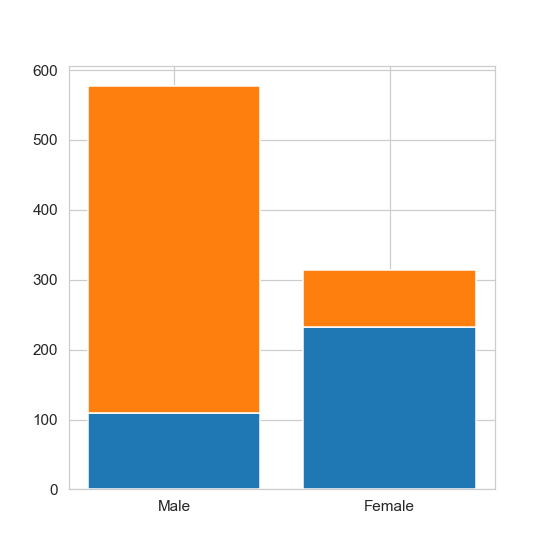

Male: died: 81.10918544194108 Survived: 18.890814558058924
Female: died: 25.796178343949045 Survived: 74.20382165605096


In [3]:
# breakdown by sex 

sex_dic = {}

for x in range(len(train_df)): 
    gender = str(train_df.loc[x, 'Sex']).capitalize().strip()
   # print(gender, type(gender))

    if gender not in sex_dic: 
        sex_dic[gender] = [0, 0]
    
    if train_df.loc[x, 'Survived'] == 0: # died 
        sex_dic[gender][0] += 1
    else: # survived
        sex_dic[gender][1] += 1

print(sex_dic)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(range(len(sex_dic)), np.array(list(sex_dic.values()))[:,1], align='center')
# top values: deaths 
plt.bar(range(len(sex_dic)), np.array(list(sex_dic.values()))[:,0], \
        align='center', bottom=np.array(list(sex_dic.values()))[:,1])
# label your columns now 
plt.xticks(range(len(sex_dic)), sex_dic.keys())

plt.show()

print('Male: died:', sex_dic['Male'][0]*100/sum(sex_dic['Male']), \
      'Survived:', sex_dic['Male'][1]*100/sum(sex_dic['Male']))
print('Female: died:', sex_dic['Female'][0]*100/sum(sex_dic['Female']), \
      'Survived:', sex_dic['Female'][1]*100/sum(sex_dic['Female']))

In [ ]:
# breakdown by sex 

print('Male: died:', sex_dic['Male'][0]*100/sum(sex_dic['Male']), \
      'Survived:', sex_dic['Male'][1]*100/sum(sex_dic['Male']))
print('Female: died:', sex_dic['Female'][0]*100/sum(sex_dic['Female']), \
      'Survived:', sex_dic['Female'][1]*100/sum(sex_dic['Female']))

{'First': 0, 'Second': 0, 'Third': 0}
{'First': 216, 'Second': 184, 'Third': 491}


<IPython.core.display.Javascript object>


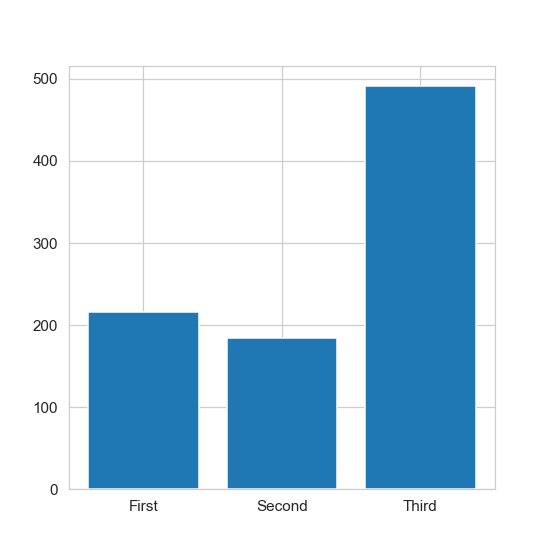

In [4]:
# simple total people broken down by class 
class_dic = {'First':0, 'Second':0, 'Third': 0}
print(class_dic)

for y in train_df['Pclass']:
    if y == 1: 
        class_dic['First'] += 1
    elif y == 2: 
        class_dic['Second'] += 1 
    else: 
        class_dic['Third'] += 1
    
print(class_dic)

fig2 = plt.figure(figsize=(5,5))
ax= fig2.add_subplot(111)

plt.bar(class_dic.keys(), class_dic.values())

plt.show()

nan nan 1.0


<IPython.core.display.Javascript object>


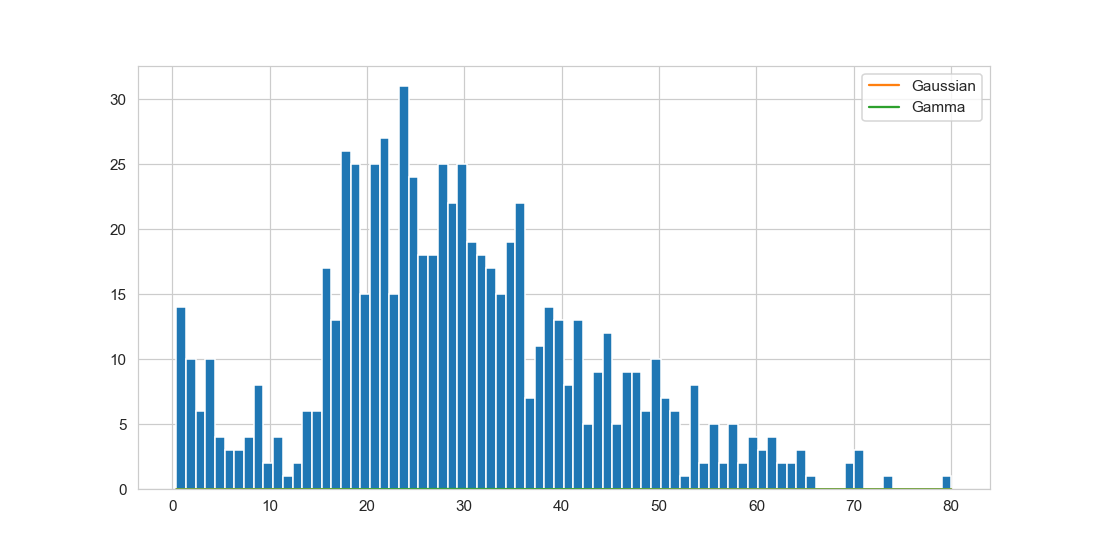

/Users/risa/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/risa/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [6]:
# graph of age histogram

ave_age = train_df['Age'].mean()
median_age = train_df['Age'].median()
mode_age = train_df['Age'].mode()
std_age = train_df['Age'].std()

#print('x_bar =', ave_age,'+/-', std_age,'x_med = ', median_age, 'mode(s) = ', mode_age)

# get min and max values for age
age_min, age_max = min(train_df['Age']), max(train_df['Age'])
# make linespace for x values to generate possible fits 
fit_x_values = np.linspace(age_min, age_max, len(train_df))

# gaussian fit line using the generated mean and std: 
pdf_g = stats.norm.pdf(fit_x_values, ave_age, std_age)

# gamma fit: 
ag,bg,cg = stats.gamma.fit(train_df['Age'])  
print(ag,bg,cg)
pdf_gamma = stats.gamma.pdf(fit_x_values, 6,5,4.5)  
#print(pdf_gamma)

fig3 = plt.figure(figsize=(10,5))
ax= fig3.add_subplot(111)

age_bins= int(age_max - age_min +1)

plt.hist(train_df['Age'], bins=age_bins)#, density='True')
plt.plot(fit_x_values, pdf_g, label = 'Gaussian')
plt.plot(fit_x_values, pdf_gamma, label='Gamma')

plt.legend()
plt.show()

27


<IPython.core.display.Javascript object>


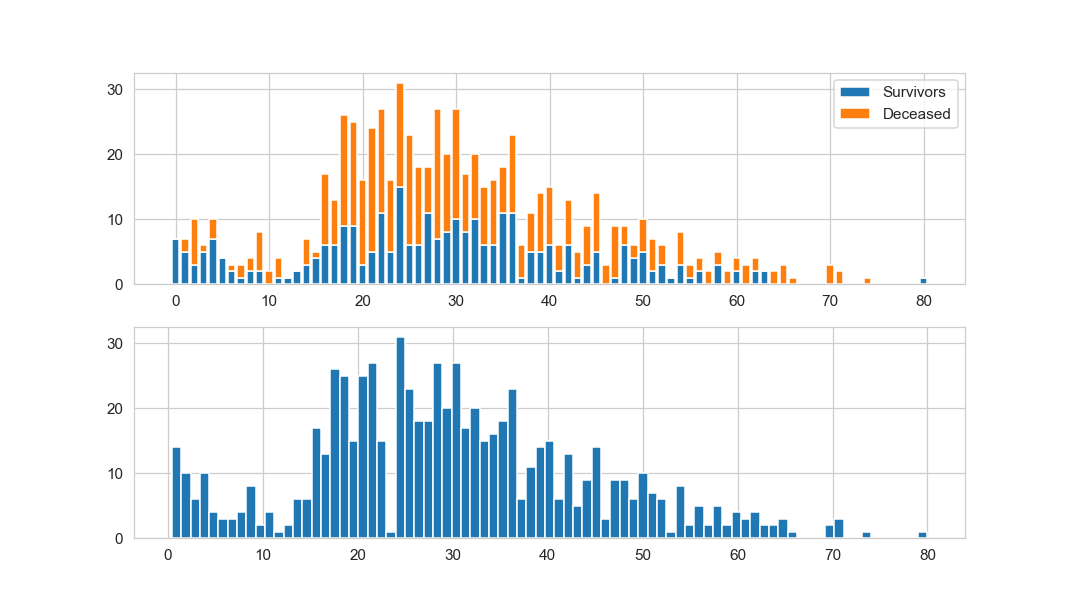

In [13]:
def make_Ord_dic(pd_data, dic):
    nan_count = 0
    for x in range(len(pd_data)): 
        age = pd_data.loc[x,"Age"]
        if np.isnan(age): 
            nan_count +=1
        else: 
            #print(age)
            if int(age) not in dic: 
                dic[int(age)] = [0,0]
            if pd_data.loc[x,"Survived"] == 0: 
                #print('survived', dic[int(age)])
                dic[int(age)][0] +=1
            else:
               # print('died',dic[int(age)])
                dic[int(age)][1] +=1
    
    dic = collections.OrderedDict(sorted(dic.items()))
    return dic, nan_count

import collections  # make an ordered dic 

order_dic = collections.OrderedDict()

min_age = int(min(train_df['Age']))
max_age = int(max(train_df['Age']))

min_test = int(min(test_df['Age']))
max_test = int(max(test_df['Age']))

order_dic, na_num = make_Ord_dic(train_df, order_dic)
#order_dic, na_num = make_Ord_dic(test_df,order_dic)
#print(order_dic)
#print(nan_count)
age_23 =0
for x in train_df["Age"]: 
    if (x >=22) and (x<23): 
        age_23 +=1
print(age_23)

fig7 = plt.figure(figsize=(9.75,5.5))
ax= fig7.add_subplot(211)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,1], align='center', label='Survivors')
# top values: deaths 
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,0], \
        align='center', bottom=np.array(list(order_dic.values()))[:,1],label='Deceased' )

plt.legend(loc='best')

ax= fig7.add_subplot(212)
age_bins= int(max_age - min_age +1)
plt.hist(train_df['Age'], bins=age_bins)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[12 10 12  7 10  5  6  4  6 10  4  5  3]
[-0.60989011 10.89010989]


<IPython.core.display.Javascript object>


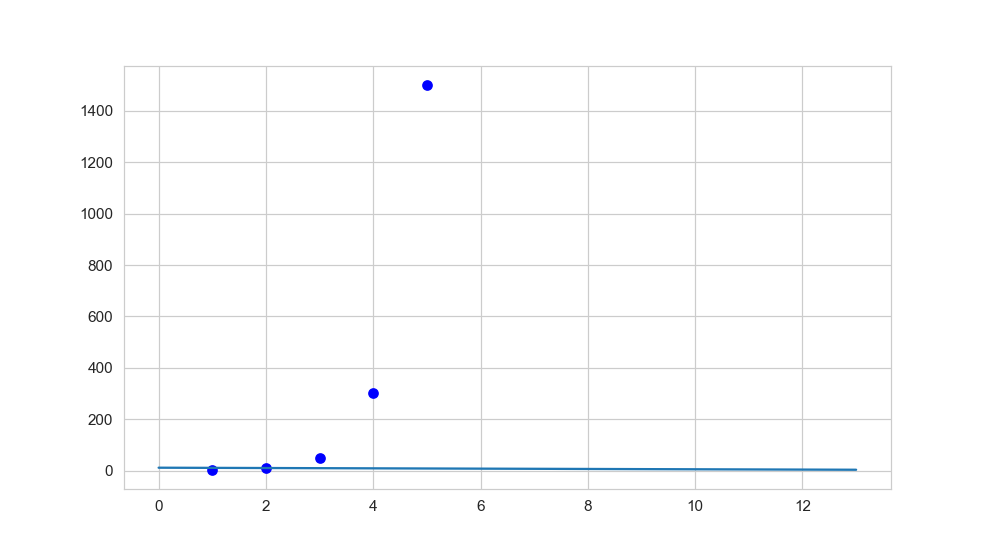

In [83]:
# make fits to age data 
def fit_13u(x,a,b):
    return a*x +b

xdata = np.array([1,2,3,4,5])
ydata = np.array([1,9,50,300,1500])

par,pcov = cf(fit_13u,np.array(list(age_under_13.keys())),np.array(list(age_under_13.values())))
print(np.array(list(age_under_13.keys())))
print(np.array(list(age_under_13.values())))
print(par)

xfit_test = np.linspace(0,13,200)

fig8 = plt.figure(figsize=(9,5))
ax= fig8.add_subplot(111)

plt.plot(xdata,ydata,'bo', label='experimental')
plt.plot(xfit_test, fit_13u(xfit_test,*par), label='fit')

plt.show()

OrderedDict([(0, 12), (1, 10), (2, 12), (3, 7), (4, 10), (5, 5), (6, 6), (7, 4), (8, 6), (9, 10), (10, 4), (11, 5), (12, 3), (13, 5), (14, 10), (15, 6), (16, 19), (17, 20), (18, 42), (19, 29), (20, 24), (21, 41), (22, 44), (23, 27), (24, 48), (25, 34), (26, 31), (27, 30), (28, 35), (29, 30), (30, 42), (31, 23), (32, 28), (33, 21), (34, 18), (35, 23), (36, 33), (37, 9), (38, 15), (39, 20), (40, 21), (41, 11), (42, 18), (43, 9), (44, 10), (45, 23), (46, 6), (47, 14), (48, 14), (49, 9), (50, 15), (51, 8), (52, 6), (53, 4), (54, 10), (55, 9), (56, 4), (57, 5), (58, 6), (59, 3), (60, 8), (61, 5), (62, 5), (63, 4), (64, 5), (65, 3), (66, 1), (67, 1), (70, 3), (71, 2), (74, 1), (76, 1), (80, 1)])
177
86
[0.00036787 0.0003675  0.00036714 0.00036678 0.00036641 0.00036605
 0.00036569 0.00036532 0.00036496 0.0003646  0.00036424 0.00036387
 0.00036351]
[0.02394865 0.02207553 0.02039597 0.01888133 0.01750886 0.01626019
 0.01512021 0.01407636 0.01311804 0.01223624 0.01142322 0.01067228
 0.00997757 0

<IPython.core.display.Javascript object>


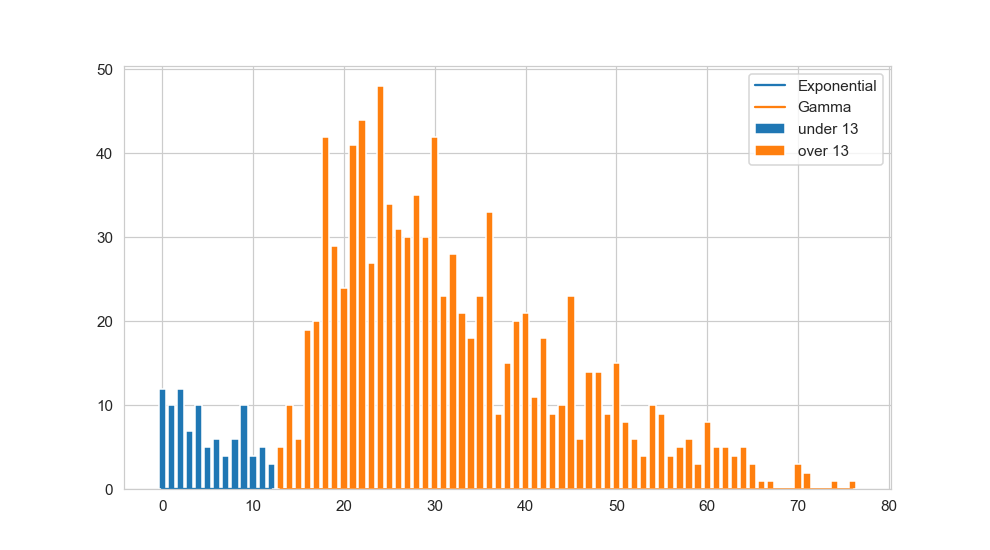

In [15]:
def make_age_dic(pd_data, dic):
    nan_count = 0
    for x in range(len(pd_data)): 
        age = pd_data.loc[x,"Age"]
        if np.isnan(age): 
            nan_count +=1
        else: 
            #print(age, int(age))
            if int(age) not in dic: 
                dic[int(age)] = 0
            
            dic[int(age)] +=1
    
    dic = collections.OrderedDict(sorted(dic.items()))
    return dic, nan_count

def age_surv(dic_old, dic_new):
    dic_new[dic_old.keys()] = 0
    print(dic_new)
    #for x in range(len(dic_old)): 
        

import collections  # make an ordered dic 

age_dic = collections.OrderedDict()
age_dic, na_train = make_age_dic(train_df, age_dic)
age_dic, na_test = make_age_dic(test_df,age_dic)
print(age_dic, na_train, na_test, sep='\n')

age_under_13 = {x: age_dic[x] for x in range(13) if x in age_dic}
age_over_13 = {x: age_dic[x] for x in range(13,max(age_dic.keys())) if x in age_dic}

#print(age_under_13) 
#print(age_over_13)

x_val_13u = np.linspace(min(age_under_13.keys()), max(age_under_13.keys()), len(age_under_13.keys()))
#expon 
a,b = stats.expon.fit(list(age_under_13.values()), floc=-1000)
pdf_exp = stats.expon.pdf(x_val_13u,a,b)
print(pdf_exp)
#pylab.plot(lnspc, pdf_exp, label='exponential')

# gamma fit: 
x_val_13o = np.linspace(min(age_over_13.keys()), max(age_over_13.keys()), len(age_over_13.keys()))
ag,bg,cg = stats.gamma.fit(list(age_over_13.values()))
pdf_gamma = stats.gamma.pdf(x_val_13o, ag,bg,cg) 
print(pdf_gamma)

fig8 = plt.figure(figsize=(9,5))
ax= fig8.add_subplot(111)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(age_under_13.keys(), age_under_13.values(), align='center', label='under 13')
plt.bar(age_over_13.keys(), age_over_13.values(), align='center', label='over 13')
plt.plot(x_val_13u, pdf_exp, label='Exponential')
plt.plot(x_val_13o, pdf_gamma, label ='Gamma')


plt.legend()
plt.show()




In [32]:
def age_surv(dic_old, dic_new):
    for key,value in dic_old.items():
        dic_new[key] = value[1]/sum(value)*100
    return dic_new
    #for x in range(len(dic_old)): 
        

import collections  # make an ordered dic 

surv_age = collections.OrderedDict()
print(order_dic)
surv_age = age_surv(order_dic, surv_age)
print(surv_age)


OrderedDict([(0, [0, 7]), (1, [2, 5]), (2, [7, 3]), (3, [1, 5]), (4, [3, 7]), (5, [0, 4]), (6, [1, 2]), (7, [2, 1]), (8, [2, 2]), (9, [6, 2]), (10, [2, 0]), (11, [3, 1]), (12, [0, 1]), (13, [0, 2]), (14, [4, 3]), (15, [1, 4]), (16, [11, 6]), (17, [7, 6]), (18, [17, 9]), (19, [16, 9]), (20, [13, 3]), (21, [19, 5]), (22, [16, 11]), (23, [11, 5]), (24, [16, 15]), (25, [17, 6]), (26, [12, 6]), (27, [7, 11]), (28, [20, 7]), (29, [12, 8]), (30, [17, 10]), (31, [9, 8]), (32, [10, 10]), (33, [9, 6]), (34, [10, 6]), (35, [7, 11]), (36, [12, 11]), (37, [5, 1]), (38, [6, 5]), (39, [9, 5]), (40, [9, 6]), (41, [4, 2]), (42, [7, 6]), (43, [4, 1]), (44, [6, 3]), (45, [9, 5]), (46, [3, 0]), (47, [8, 1]), (48, [3, 6]), (49, [2, 4]), (50, [5, 5]), (51, [5, 2]), (52, [3, 3]), (53, [0, 1]), (54, [5, 3]), (55, [2, 1]), (56, [2, 2]), (57, [2, 0]), (58, [2, 3]), (59, [2, 0]), (60, [2, 2]), (61, [3, 0]), (62, [2, 2]), (63, [0, 2]), (64, [2, 0]), (65, [3, 0]), (66, [1, 0]), (70, [3, 0]), (71, [2, 0]), (74, [1,

In [ ]:
# survival and falalities probabilities based on class

survival = {1: 0, 2:0, 3: 0}
fatalities = {1: 0, 2:0, 3: 0}

class_name = ['First', 'Second', 'Third']

for y in range(len(train_df)): 
    if train_df.loc[y,'Survived'] == 0: 
        fatalities[train_df.loc[y,'Pclass']] += 1
    else: 
        survival[train_df.loc[y,'Pclass']] +=1
print(survival)
print(fatalities)

surv_frac = []
for y in range(1,len(survival)+1): 
    surv_frac.append( round(survival[y]/(survival[y] + fatalities[y])*100, 1))

print(surv_frac[0])

fig4 = plt.figure(figsize=(10,6))
ax= fig4.add_subplot(111)

# plot data stacked 
plt.bar(class_name, survival.values(), width=0.8, label='Survivors')
#plt.bar(survived.keys(), survived.values(), width=0.8, label='Survivors', bottom=fatalities)
plt.bar(class_name, fatalities.values(), width=0.8, label='Deceased', bottom=list(survival.values()))

plt.legend(loc='best')

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
    
# set individual bar lables using above list
total = sum(totals)

first = True
j = 1
# set individual bar lables using above list
for i in ax.patches:
    print('y', i.get_height())
    print(survival[3])
    if i.get_height() == fatalities[1]: 
        first = False
    # get_x pulls left or right; get_height pushes up or down
    if not first: 
        print('not first')
        print('x', i.get_x())
        print('y', i.get_height(), 'surv', survival[j])
        print('label', str(round((i.get_height()/total)*100, 2))+'%')
        ax.text(i.get_x()+0.15, i.get_height()+survival[j]+1, str(surv_frac[j-1])+' % survival', fontsize=12)
        j+=1
        print(j)

plt.show()

In [ ]:
print(survival[1])

In [ ]:
#testing nested dictionary, key: [value, value]
class_demo = {}

for x in range(len(class_name)): 
    class_demo[class_name[x]] = [fatalities[x+1], survival[x+1]]

print(class_demo)
print(class_demo['First'])
print(class_demo['Second'][0], class_demo['Third'][1])
print(class_demo.values())
print(class_demo)

In [ ]:
# make more efficient 
survival = {1: 0, 2:0, 3: 0}
fatalities = {1: 0, 2:0, 3: 0}

class_name = ['First', 'Second', 'Third']

for y in range(len(train_df)): 
    if train_df.loc[y,'Survived'] == 0: 
        fatalities[train_df.loc[y,'Pclass']] += 1
    else: 
        survival[train_df.loc[y,'Pclass']] +=1

surv_frac = []
for y in range(1,len(survival)+1): 
    surv_frac.append( round(survival[y]/(survival[y] + fatalities[y])*100, 1))

# plot the figure change to 5 
fig4 = plt.figure(figsize=(10,5))
ax= fig4.add_subplot(111)

# plot data stacked 
plt.bar(class_name, survival.values(), width=0.8, label='Survivors')
#plt.bar(survived.keys(), survived.values(), width=0.8, label='Survivors', bottom=fatalities)
plt.bar(class_name, fatalities.values(), width=0.8, label='Deceased', bottom=list(survival.values()))

plt.legend(loc='best')

first = True
j = 1
# set individual bar lables using above list
for i in ax.patches:

    if i.get_height() == fatalities[1]: 
        first = False
    # get_x pulls left or right; get_height pushes up or down
    if not first: 
        ax.text(i.get_x()+0.15, i.get_height()+survival[j]+1, str(surv_frac[j-1])+' % survival', fontsize=12)
        j+=1

plt.show()
print('first class', survival[1] + fatalities[1], 'second class', \
      survival[2] + fatalities[2] , 'third class',survival[3] + fatalities[3])

{'Southhampton, England': [427, 217], 'Cherbourg, France': [75, 94], 'Queenstown, Ireland': [47, 31]}


<IPython.core.display.Javascript object>


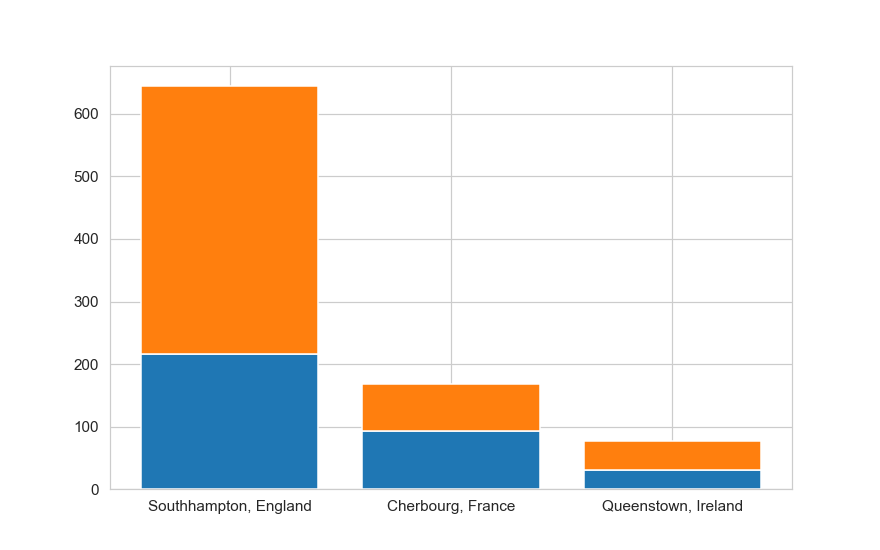

Southhampton, England Survival: 33.69565217391305
Cherbourg, France Survival: 55.62130177514793
Queenstown, Ireland Survival: 39.743589743589745


In [31]:
# breakdown by port/nationality 

port_dic = {'Southhampton, England' : [0,0], 'Cherbourg, France' : [0,0], 'Queenstown, Ireland' : [0,0]}

for x in range(len(train_df)): 
    letter = str(train_df.loc[x, 'Embarked']).capitalize().strip()
    
    for key in port_dic:
        if letter == list(key)[0] :
            port = key
            
    if train_df.loc[x, 'Survived'] == 0: # died 
        port_dic[port][0] += 1
    else: # survived
        port_dic[port][1] += 1

print(port_dic)

fig4 = plt.figure(figsize=(8,5))
ax= fig4.add_subplot(111)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(port_dic.keys(), np.array(list(port_dic.values()))[:,1], align='center', label='Survivors')
# top values: deaths 
plt.bar(port_dic.keys(), np.array(list(port_dic.values()))[:,0], \
        align='center', bottom=np.array(list(port_dic.values()))[:,1],label='Deceased' )


plt.show()

for key in port_dic : 
    print(key,'Survival:', port_dic[key][1]*100/sum(port_dic[key]))

In [27]:
    

min_age = int(min(train_df['Age']))
max_age = int(max(train_df['Age']))

min_test = int(min(test_df['Age']))
max_test = int(max(test_df['Age']))

print(min_test, max_test)
array = np.array(range(max_age +1))
print(array)

age_dic = {}
for x in array: 
    age_dic[array[x]] = [0,0]
    
nan_count = 0
for x in range(len(train_df)): 
   # print('--------',x,'---------')
    age = round(train_df.loc[x,'Age'])
   # print('age', age, type(age))
    
    if np.isnan(age): 
        nan_count += 1
    else: 
        if train_df.loc[x, 'Survived'] == 0: 
            #print('dead')# died 
            age_dic[int(age)][0] += 1
           # print(age_dic)
    
        else: # survived
          #  print('alive')
            age_dic[int(age)][1] += 1
          #  print(age_dic)
            
    #print(age_dic[age])
    
print(age_dic)
print(nan_count)

0 76
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]
{0: [0, 1], 1: [2, 11], 2: [7, 3], 3: [1, 5], 4: [3, 7], 5: [0, 4], 6: [1, 2], 7: [2, 1], 8: [2, 2], 9: [6, 2], 10: [2, 0], 11: [3, 1], 12: [0, 1], 13: [0, 2], 14: [4, 3], 15: [1, 4], 16: [11, 6], 17: [7, 6], 18: [17, 9], 19: [16, 9], 20: [13, 3], 21: [19, 5], 22: [16, 11], 23: [10, 5], 24: [17, 15], 25: [17, 6], 26: [12, 6], 27: [7, 11], 28: [20, 7], 29: [12, 8], 30: [17, 10], 31: [9, 8], 32: [10, 10], 33: [9, 6], 34: [10, 6], 35: [7, 11], 36: [12, 11], 37: [5, 1], 38: [6, 5], 39: [9, 5], 40: [9, 6], 41: [4, 2], 42: [7, 6], 43: [4, 1], 44: [6, 3], 45: [7, 5], 46: [5, 0], 47: [8, 1], 48: [3, 6], 49: [2, 4], 50: [5, 5], 51: [5, 2], 52: [3, 3], 53: [0, 1], 54: [5, 3], 55: [1, 1], 56: [3, 2], 57: [2, 0], 58: [2, 3], 59: [2, 0], 60: [2, 2], 

In [28]:
import collections  # make an ordered dic 
test_df = pd.read_csv('data/titanic_test.csv')
train_df = pd.read_csv('data/titanic_train.csv')

order_dic = collections.OrderedDict()

min_age = int(min(train_df['Age']))
max_age = int(max(train_df['Age']))

min_test = int(min(test_df['Age']))
max_test = int(max(test_df['Age']))

nan_count = 0

for x in range(len(train_df)): 
    age = train_df.loc[x,'Age']
    
    if np.isnan(age): 
        nan_count += 1
    else: 
        if int(age) not in order_dic: 
            order_dic[int(age)] = [0,0]
        if train_df.loc[x, 'Survived'] == 0: 
            order_dic[int(age)][0] +=1
        else: # survived
            order_dic[int(age)][1] +=1

order_dic = collections.OrderedDict(sorted(order_dic.items()))    
#print(order_dic)
#print(nan_count)

dic_o2 = collections.OrderedDict()
#print(int(max(train_df['Age'])))

age_df = train_df
age_df["Age"] = age_df["Age"].astype(float).dropna()#.astype(int)
#print(age_df["Age"])
#print(train_df)

#for x in range(int(max(train_df['Age']))+1):
 #   dic_o2[x] = list(train_df["Survived"][train_df["Age"] == x].value_counts().sort_values())

#dic_o2 = collections.OrderedDict(sorted(dic_o2.items()))
#print(dic_o2)
#print(train_df["Survived"][train_df["Age"] == 0].count())

OrderedDict([(0, [0, 7]), (1, [2, 5]), (2, [7, 3]), (3, [1, 5]), (4, [3, 7]), (5, [0, 4]), (6, [1, 2]), (7, [2, 1]), (8, [2, 2]), (9, [6, 2]), (10, [2, 0]), (11, [3, 1]), (12, [0, 1]), (13, [0, 2]), (14, [4, 3]), (15, [1, 4]), (16, [11, 6]), (17, [7, 6]), (18, [17, 9]), (19, [16, 9]), (20, [13, 3]), (21, [19, 5]), (22, [16, 11]), (23, [11, 5]), (24, [16, 15]), (25, [17, 6]), (26, [12, 6]), (27, [7, 11]), (28, [20, 7]), (29, [12, 8]), (30, [17, 10]), (31, [9, 8]), (32, [10, 10]), (33, [9, 6]), (34, [10, 6]), (35, [7, 11]), (36, [12, 11]), (37, [5, 1]), (38, [6, 5]), (39, [9, 5]), (40, [9, 6]), (41, [4, 2]), (42, [7, 6]), (43, [4, 1]), (44, [6, 3]), (45, [9, 5]), (46, [3, 0]), (47, [8, 1]), (48, [3, 6]), (49, [2, 4]), (50, [5, 5]), (51, [5, 2]), (52, [3, 3]), (53, [0, 1]), (54, [5, 3]), (55, [2, 1]), (56, [2, 2]), (57, [2, 0]), (58, [2, 3]), (59, [2, 0]), (60, [2, 2]), (61, [3, 0]), (62, [2, 2]), (63, [0, 2]), (64, [2, 0]), (65, [3, 0]), (66, [1, 0]), (70, [3, 0]), (71, [2, 0]), (74, [1,

<IPython.core.display.Javascript object>


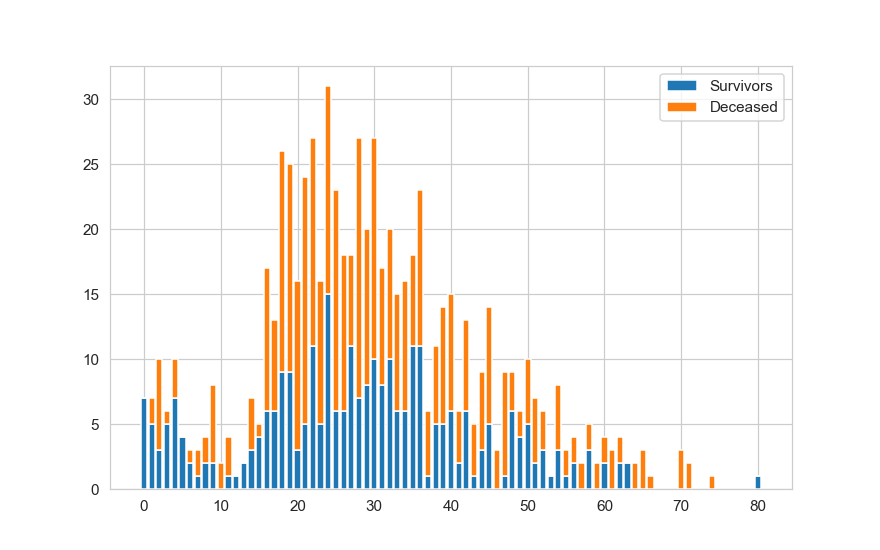

In [30]:
import collections  # make an ordered dic 

order_dic = collections.OrderedDict()

min_age = int(min(train_df['Age']))
max_age = int(max(train_df['Age']))

min_test = int(min(test_df['Age']))
max_test = int(max(test_df['Age']))

nan_count = 0

for x in range(len(train_df)): 
    age = train_df.loc[x,'Age']
    
    if np.isnan(age): 
        nan_count += 1
    else: 
        if int(age) not in order_dic: 
            order_dic[int(age)] = [0,0]
        if train_df.loc[x, 'Survived'] == 0: 
            order_dic[int(age)][0] +=1
        else: # survived
            order_dic[int(age)][1] +=1

order_dic = collections.OrderedDict(sorted(order_dic.items()))    
print(order_dic)
print(nan_count)

fig7 = plt.figure(figsize=(8,5))
ax= fig7.add_subplot(111)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,1], align='center', label='Survivors')
# top values: deaths 
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,0], \
        align='center', bottom=np.array(list(order_dic.values()))[:,1],label='Deceased' )

plt.legend(loc='best')
plt.show()

OrderedDict([(0, [0, 7]), (1, [2, 5]), (2, [7, 3]), (3, [1, 5]), (4, [3, 7]), (5, [0, 4]), (6, [1, 2]), (7, [2, 1]), (8, [2, 2]), (9, [6, 2]), (10, [2, 0]), (11, [3, 1]), (12, [0, 1]), (13, [0, 2]), (14, [4, 3]), (15, [1, 4]), (16, [11, 6]), (17, [7, 6]), (18, [17, 9]), (19, [16, 9]), (20, [13, 3]), (21, [19, 5]), (22, [16, 11]), (23, [11, 5]), (24, [16, 15]), (25, [17, 6]), (26, [12, 6]), (27, [7, 11]), (28, [20, 7]), (29, [12, 8]), (30, [17, 10]), (31, [9, 8]), (32, [10, 10]), (33, [9, 6]), (34, [10, 6]), (35, [7, 11]), (36, [12, 11]), (37, [5, 1]), (38, [6, 5]), (39, [9, 5]), (40, [9, 6]), (41, [4, 2]), (42, [7, 6]), (43, [4, 1]), (44, [6, 3]), (45, [9, 5]), (46, [3, 0]), (47, [8, 1]), (48, [3, 6]), (49, [2, 4]), (50, [5, 5]), (51, [5, 2]), (52, [3, 3]), (53, [0, 1]), (54, [5, 3]), (55, [2, 1]), (56, [2, 2]), (57, [2, 0]), (58, [2, 3]), (59, [2, 0]), (60, [2, 2]), (61, [3, 0]), (62, [2, 2]), (63, [0, 2]), (64, [2, 0]), (65, [3, 0]), (66, [1, 0]), (70, [3, 0]), (71, [2, 0]), (74, [1,

<IPython.core.display.Javascript object>


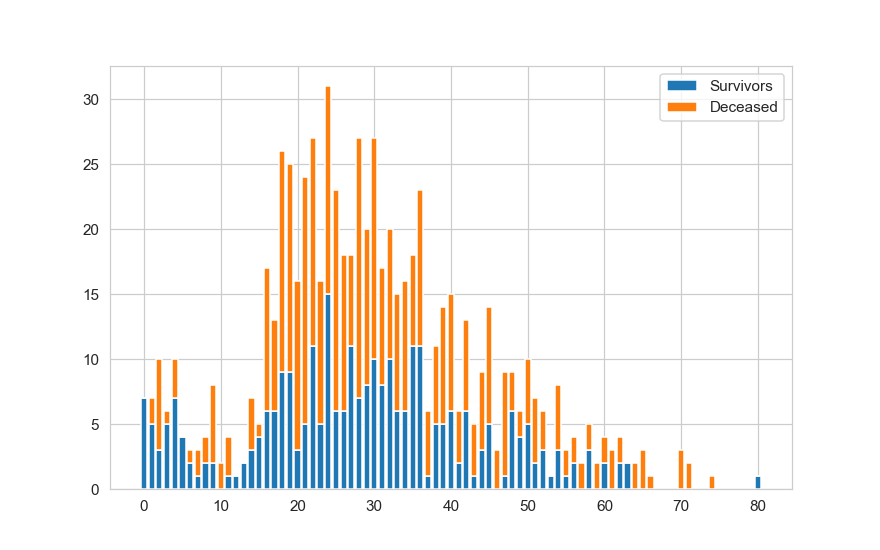

In [29]:
def make_Ord_dic(pd_data, dic):
    nan_count = 0
    for x in range(len(pd_data)): 
        age = pd_data.loc[x,"Age"]
        if np.isnan(age): 
            nan_count +=1
        else: 
            if int(age) not in dic: 
                dic[int(age)] = [0,0]
            if pd_data.loc[x,"Survived"] == 0: 
                dic[int(age)][0] +=1
            else:
                dic[int(age)][1] +=1
    
    dic = collections.OrderedDict(sorted(dic.items()))
    return dic, nan_count

import collections  # make an ordered dic 

order_dic = collections.OrderedDict()

min_age = int(min(train_df['Age']))
max_age = int(max(train_df['Age']))

min_test = int(min(test_df['Age']))
max_test = int(max(test_df['Age']))

order_dic, na_num = make_Ord_dic(train_df, order_dic)
#order_dic, na_num = make_Ord_dic(test_df,order_dic)
print(order_dic)
print(nan_count)

fig7 = plt.figure(figsize=(8,5))
ax= fig7.add_subplot(111)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,1], align='center', label='Survivors')
# top values: deaths 
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,0], \
        align='center', bottom=np.array(list(order_dic.values()))[:,1],label='Deceased' )

plt.legend(loc='best')
plt.show()

In [ ]:
the_keys = [0,1,2,3]
dic_test = dict.fromkeys(the_keys, [0,0])
dic_other = {0:[0,0], 1:[0,0], 2:[0,0], 3:[0,0]}
print(dic_test)
print(dic_other)

dic_test[0][1] = 3 
dic_test[2][1] = 3 
dic_test[1][1] = 0 
dic_test[3][1] = 5 

dic_other[0][1] = 3 
dic_other[2][1] = 3 
dic_other[1][1] = 0 
dic_other[3][1] = 5 
print(dic_test)
print(dic_other)

In [ ]:
# gameify test 
name = input("What is your name?")
print("Nice to mett you,", name)

In [41]:


from ansimarkup import parse, ansiprint

parse("<b>bold</b> <d>dim</d>")

# ansiprint() works exactly like print(), but first runs parse() on all arguments.
ansiprint("<b>bold</b>", "<d>dim</d>")
ansiprint("<b>bold</b>", "<d>dim</d>", sep=":")

# Colors may be specified in one of several ways.
ansiprint("<red>red foreground</red>")
ansiprint("<RED>red background</RED>")
ansiprint("<fg red>red foreground</fg red>")
ansiprint("<bg red>red background</bg red>")

# Xterm, hex and rgb colors are accepted by the <fg> and <bg> tags.
ansiprint("<fg 86>aquamarine foreground</fg 86>")
ansiprint("<bg #00005f>dark blue background</bg #00005f>")
ansiprint("<fg 0,95,0>dark green foreground</fg 0,95,0>")

# Tags may be nested.
ansiprint("<r><Y>red text on a yellow foreground</Y></r>")

# The above may be more concisely written as:
ansiprint("<r,y>red text on a yellow background</r,y>")

# This shorthand also supports style tags.
ansiprint("<b,r,y>bold red text on a yellow background</b,r,y>")
ansiprint("<b,r,>bold red text</b,r,>")
ansiprint("<b,,y>bold regular text on a yellow background</b,,y>")

# Unrecognized tags are left as-is.
ansiprint("<b><element1></element1></b>")

#colours
ansiprint("<b,r,>bold red text</b,r,>")
ansiprint("<b,e,> blue </b,e,>")
ansiprint("<y> yellow </y>")
ansiprint("<g> green </g>")
ansiprint("")

bold dim
bold:dim
red foreground
red background
red foreground
red background
aquamarine foreground
dark blue background
dark green foreground
red text on a yellow foreground
red text on a yellow background
bold red text on a yellow background
bold red text
bold regular text on a yellow background
<element1></element1>
bold red text
 blue 
 yellow 
 green 



In [2]:
# the game 
from ansimarkup import parse, ansiprint # colours 
# for generating random seeds in the game 
from random import seed
from random import random
# seed random number generator
seed(1)

In [66]:
# the game 
# for generating random seeds in the game 
from random import seed
from random import random
# seed random number generator
seed(1)

#definitions  
def intro(): 
    # sets out some of the main parameters of the game, sex, age, class, trouble (for demoting player) 
    ansiprint("<b,g,>James:</b,g,>",\
        "<g>Hello, Welcome aboard the Titanic! My name is James, I am one of the crew members aboard this unsinkable ship.</g>",\
        "<g>May I take your name and see your ticket for the passenger list, please?</g>")
    name = str(input("Your name: "))
    name = name.strip()
    ansiprint("<b,g,>James:</b,g,>","<g>Nice to meet you, %s. I will take your ticket now.</g>" % name)
    ticket = str(input("Hand James your ticket? (Y/N): ")).upper().strip()
    trouble = check_ticket(ticket, "James", True) 

    sex = str(input("What is your character's sex, Male or Female?")).upper().strip()
    title, sex_bin, sex = sex_loop(sex)
    
    ansiprint("<b,g,>James:</b,g,>", "<g>%s, Can you tell me your age?</g>" %title[1])   
    age = int(input("What is your character's age"))
    age, trouble = age_loop(age,"James", trouble)
        
    ansiprint("<b,g,>James:</b,g,>", "<g>%s, Can you tell which Class you booked?</g>" %title[1])
    print('Pick your class number:','1 = First class', '2 = Second class', '3 = Third Class', sep="\n")
    pclass = int(input())
    trouble, pclass = class_loop(pclass, trouble, "James")
    
    #print('Your port:','1 = Southhampton, England', '2 = Cherbourg, France', '3 = Queenstown, Ireland', sep="\n")
    #port = int(input())
    #port_loop(port, pclass, sex_bin)

    return name, age, sex, sex_bin, pclass, trouble, title

def check_ticket(ticket, chr_name, first):
    # "looks at the ticket, runs though iterations if players try to get around it"
    ticket_loop = True
    no_first = 0
    while ticket_loop: 
        if len(ticket) > 1: 
            ticket = ticket[0]
        if (ticket == "Y") and (first == True): 
            ansiprint("<b>You hand %s your ticket.</b>" % chr_name)
            ansiprint("<b,g,>%s:</b,g,> <g>Thank you</g>" % chr_name)
            ansiprint("<b>He rips the detachable strip down the side of your ticket and begins to read your details.</b>")
            ansiprint("<b,g,>%s:</b,g,> <g>Your ticket has become quite unreadable I'm afraid. I will need you to tell me some of your missing details.</g>" % chr_name)
            ticket_loop = False
        elif (ticket == "N") and (first == True): 
            no_first += 1
            if no_first <3: 
                ansiprint("<b,g,>%s:</b,g,> <g>I'm sorry but to board the ship you must present your ticket</g>" % chr_name)
                ticket = str(input("Hand %s your ticket? (Y/N): " % chr_name)).upper().strip()
            if no_first >= 3: 
                ansiprint("<b,g,>%s:</b,g,> <g>You have left me no choice, I must insist</g>" % chr_name)
                ansiprint("<b>Officers have come and forcibly handed your ticket to %s</b>" % chr_name)
                ansiprint("<b,g,>%s:</b,g,> <g>Your ticket's almost ruined! You need to tell me your missing details.</g>" % chr_name)
                ticket_loop = False  
        else: 
            no_first += 1
            if no_first < 3: 
                ansiprint("<b,g,>%s:</b,g,> <g>Sorry, I didn't chatch that </g>" % chr_name)
                ticket = str(input("Hand %s your ticket? (Y/N): " % chr_name)).upper().strip()
            else: 
                ticket = 'N'
                no_first -= 1
    
    return no_first

def sex_loop(sex): 
    if len(sex) > 1: 
        sex = sex[0]
    
    if (sex != "M") and (sex != "F"): 
        print("Sorry, binary due to the fact that its 1912 and there is no non-binary data")
        print("Rolling the dice for random assignment")
        ran = random()
        if ran<= 0.5: 
            sex= 'M'
        else:
            sex= "F"
    if sex == "M": 
        sex_bin = 0
        title = ["Mr.", "Sir"]
        assign = "Male"
    else: 
        sex_bin = 1 
        title = ["Ms.", "Miss"]
        assign = "Female"
    
    print("Your Character is: %s" %assign)
    return title, sex_bin, sex

def age_loop(age, chr_name, trouble): 
    # determines the age of the character if players try and use values not possible
    age_loop = True
    three_attempts = 0
    while age_loop: 
        if age <0: # negative numbers
            trouble += 1
            age = abs(age)
            ansiprint("<b,g,>%s:</b,g,> <g> A negative age?</g>"%chr_name, "<g>I'm sure you meant %i </g>"%age)
            age_loop = False
        elif (100 <= age < 122): # pretty old but not unheard of
            ansiprint("<b,g,>%s:</b,g,> <g>Thats getting up there. My Granny's that age as well.</g>" %chr_name)  
            age_loop = False
        elif age >= 122: # no one alive is that old
            trouble += 1
            three_attempts += 1
            if three_attempts <3: 
                ansiprint("<b,g,>%s:</b,g,> <g>Ha Ha. Sometimes we all feel that old, but what is your"\
                      " actual age now? </g>" %chr_name)
                age = int(input('new age:'))
            else: 
                age = int(random()*100)
                ansiprint("<b,g,>%s:</b,g,> <g>You're quite the trouble maker arn't ya?</g>"%chr_name, \
                          "<g>You look about %i to me so thats what's going in the passenger log.</g>"%age)
                age_loop = False
        else: # age between 0 and 100
            trouble -= 1
            ansiprint("<b,g,>%s:</b,g,> <g>Thank you!</g>" %chr_name)
            age_loop = False

    return age, trouble

def class_loop(pclass, trouble, chr_name): 
    #determines the class of the person, and if they have been bad (determined by trouble) they are randomly 
    # assigned to a class and if they have been good they get promoted a class
    class_loop = True
    while class_loop:
        # trouble makers
        if ((pclass > 3) or (pclass < 1)) and (trouble <= 0): # low level
            ansiprint("<b,g,>%s:</b,g,> <g>Sorry, what class what that?</g>" %chr_name)
            trouble += 1
            pclass = int(input())
        elif ((pclass > 3) or (pclass < 1)) and (1 <= trouble < 4): #mid level
            ansiprint("<b,g,>%s:</b,g,> <g>Come Now? This is no way to behave. Give us your ticket class</g>" %chr_name)
            trouble += 1
            pclass = int(input())
        elif ((pclass > 3) or (pclass < 1)) and (trouble >= 4): #high level
            trouble += 1
            ansiprint("<b,g,>%s:</b,g,> <g>Your holding up the line now</g>" %chr_name)
            ansiprint("<b>%s walks over to a bucket of keys, clearly meant for last minute ticket purchasers"\
                      " and grabs one at random.</b>" % chr_name)
            ansiprint("<b,g,>%s:</b,g,> <g>This is the key to your randomly assigned room. I dont know or care"\
                      " what the class is. You need to move out of the way so I can help the other passengers!</g>" %chr_name)
            ran = random()
            if ran < 2/3: 
                pclass = 2
            elif  2/3 <= ran < 5/6: 
                pclass = 3
            else: 
                pclass = 1 
            ansiprint("<b> You look at your newly assigned key which is labeled with '%i st Class' </b>" %pclass)
            class_loop = False
        # not trouble makers 
        elif (1 <= pclass <=3) and (trouble <=0):
            ansiprint("<b,g,>%s:</b,g,> <g>Thank you for your cooperation today! It has been"\
                      " my pleasure to help you.</g>" %chr_name)
            class_loop = False
            if pclass != 1: 
                ansiprint("<g>       You have been so great let's see if I can bump you up a class!</g>")
                ansiprint("<b>%s flips through the register of rooms, and seems to find what he is looking for.</b>" %chr_name)
                pclass = pclass -1
                ansiprint("<b,g,>%s:</b,g,> <g>Here we go!</g>" %chr_name, "<g> Your new class is %i st Class!</g>" %pclass)
                ansiprint("<b>%s finds your new room key among the keys on the table in front of him</b>" %chr_name, \
                         " <b>have a lovely day aboard the Titanic!</b>")
            else: 
                trouble -= 1

    return trouble, pclass

#def meet_character(name, title, trouble): 
    # after boarding the boat this allows you to interact with a few characters 
    
    
    
def port_loop(port, pclass, sex_bin): 
    if (port > 3) or (port <1): 
        print("Are you trying to cheat? Its not going to work. Your port is randomly assigned.")
        ran = random()
        if ran < 0.333333: 
            port = 1
        elif 0.333333 <= ran < 0.666666: 
            port = 2
        else: 
            port = 3 
        if (pclass == 3) and (sex_bin == 0): 
            print("You would normally get a penalty, but your already in Third Class and a male,",\
                  " so your chances arn't looking good...")
        if (pclass == 3) and (sex_bin == 1): 
            print("Your at the lowest class, the only penalty left is your treated as a man at the lifeboats!")
            sex_bin = 0
        elif (pclass< 3): 
            pclass = pclass +1
            print("The penalty for cheating is you lose some of your status! Your Class is now:", pclass)
    else: 
        pass 

def restart(win): 
    if win == 0: 
        print("You lost! Better luck next time.")
        play_again = str(input('Try again? (Y/N)')).upper()
    elif win == 1: 
        ansiprint("<b>You Survived!</b>")
        play_again = str(input('Try again? (Y/N)')).upper()
    
    start = False
    if play_again == 'N': 
        the_game = False 
    return the_game, start

# testing: 
start = True
the_game = True 
while the_game: 
    name, age, sex, sex_bin, pclass, trouble, title = intro()
    print("  ")
    ansiprint("<b>You have officially boarded the Titanic! You head to your room and drop off your bags.</b>", \
    "<b>You decide to walk around to get your bearings and take a look at everything the ship has to offer.</b>")
    the_game = False 
    #meet_character(name, title, trouble)

James: Hello, Welcome aboard the Titanic! My name is James, I am one of the crew members aboard this unsinkable ship. May I take your name and see your ticket for the passenger list, please?
Your name: marisa 
James: Nice to meet you, marisa. I will take your ticket now.
Hand James your ticket? (Y/N): n
James: I'm sorry but to board the ship you must present your ticket
Hand James your ticket? (Y/N): y
You hand James your ticket.
James: Thank you
He rips the detachable strip down the side of your ticket and begins to read your details.
James: Your ticket has become quite unreadable I'm afraid. I will need you to tell me some of your missing details.
What is your character's sex, Male or Female?q
Sorry, binary due to the fact that its 1912 and there is no non-binary data
Rolling the dice for random assignment
Your Character is: Male
James: Sir, Can you tell me your age?
What is your character's age1000
James: Ha Ha. Sometimes we all feel that old, but what is your actual age now? 
new a

KeyboardInterrupt: 

In [64]:
def meet_char(name, title, trouble, deck): 
    # after boarding the boat this allows you to interact with a few characters 
    a_deck, b_deck, c_deck = False, False, False
    if deck == 'A': 
        a_deck = True
        ansiprint(" ","<b>You arrive at A deck on the Promenade. Its a beautiful day. You see a lady who seems somewhat confused.</b>",\
                  "<b>She spots you and starts walking towards you.</b>", sep="\n")
        trouble = char_jones(name, title, trouble)
        ansiprint(" ","<b>After this strange encounter you decide to head back to your cabin</b>", sep="\n")
    elif deck == 'B': 
        b_deck = True
        ansiprint(" ","<b>You arrive at B's poop deck, where many of the third class passengers are taking in the sea air.",\
                  "You see a young girl looking lonely sitting on a bench. She sees your alone and comes bounding up</b>", sep="\n")
    else: # deck == 'C'
        c_deck = True
        pass
        
def char_jones(title, trouble):
    print(" ")
    ansiprint("<b,e,>Mrs. Jones:</b,e,><e> Excuse me, %s, My name is Mrs. Jones.</e>"%title[1], \
              "<e>I seem to have become quite turned around, can you help me?</e>")
    help_ = str(input("Help Mrs. Jones? (Y/N)")).strip().upper()
    help_loop = True
    if len(help_) > 1: 
        help_ = help_[0]
    while help_loop: 
        if help_ == "Y": 
            help_loop = False
            trouble -= 1
            ansiprint("<b,e,>Mrs. Jones:</b,e,><e> Thank you so much! I can't find my cabin on this huge ship.</e>",\
                     "<e>I have a terrible sense of direction. I think it's on C deck but I can't be sure.</e>",\
                     "<e>Right through that door up there is the grand staircase, we should be able to use it to</e>",\
                     "<e>find my cabin.</e>")
            ansiprint(" ","<b>You escort Mrs. Jones to the right through a large set of ornate doors.</b>",\
                     "<b>In front of you is a huge central staircase. Two men are talking at the top of the staircase.</b>",\
                     "<b>You overhear one of the men saying 'I thought she would be right back, but its been the better part of an</b>",\
                      "<b>hour and she has still not returned'.</b>",\
                      "<b>You quickly realize they are looking for Mrs. Jones, as does she.</b>", sep="\n")
            ansiprint(" ","<b,e,>Mrs. Jones:</b,e,><e> Finally! Darling I have found you. I have been lost quite some time but I found this lovely person who</e>",\
                     "<e>agreed to help me find my room again.</e>"," ", sep="\n")
            ansiprint("<b>Mrs. Jones turns to you and thanks you for your trouble but now that she has found her</b>",\
                     "<b>husband she will be fine. You say bye and head back out to the Promenade.</b>")
        elif help_ == "N": 
            help_loop = False
            trouble += 1 
            ansiprint("<b,e,>Mrs. Jones:</b,e,><e> Well I never. How rude!</e>")
            print(" ")
            ansiprint("<b>Mrs. Jones storms off through a set of ornate doors on the right</b>")
        else: 
            ansiprint("<b> You can only answer yes or no. Please try again:</b>")
            help_ = str(input("Help Mrs. Jones? (Y/N)")).strip().upper()
    
    return trouble
        
def char_clara(name, title, trouble): 
    
    
def move_deck(): 
    # move to different decks in the titanic
    ansiprint("<b>What deck would you like to go to? A, B or C deck. </b>")
    deck = str(input()).strip().upper()
    move_loop = True
    if len(deck) > 1: 
        deck = deck[0]
    while move_loop:
        if (deck == 'A') or (deck == 'B') or (deck == 'C'): 
            move_loop = False    
        else: 
            ansiprint("<b>Please choose from the options: A, B or C deck </b>")
            deck = str(input()).strip().upper()
        
    return deck

#deck_choice = move_deck()

meet_char(name, title, trouble, "A")

 
You arrive at A deck on the Promenade. Its a beautiful day. You see a lady who seems somewhat confused.
She spots you and starts walking towards you.
 
Mrs. Jones: Excuse me, Miss, My name is Mrs. Jones. I seem to have become quite turned around, can you help me?
Help Mrs. Jones? (Y/N)n
Mrs. Jones: Well I never. How rude!
 
Mrs. Jones storms off through a set of ornate doors on the right
True -1
 
After this strange encounter you decide to head back to your cabin


In [ ]:
# gameify test 
start = True
the_game = True 
while the_game: 
    if start: 
        ansiprint("<b>Your character is a passenger on the titanic. Your goal is to survive the sinking!</b>",\
                  "<b>You must choose the demographics of your character to help them survive.</b>",\
                  "<b>There are 4 demographics: age, sex (binary), class and the port of which you got on the titanic.</b>",\
                  "<b>If your a model passgenger you will be rewarded, if not face the consequences.</b>",\
                  "<b>Good Luck!</b>", '  ', sep="\n")
        
    name, age, sex, sex_bin, pclass, trouble, title = intro()
    
    # random forest 
    #choice_array = np.array([pclass, age, sex_bin, port])
    #choice_array = choice_array.reshape(1, -1)
    #live_or_die = fit_rf.predict(choice_array)
    #live_or_die_pcnt = fit_rf.predict_proba(choice_array)
    
    print('Calculating result for:')
    print("Name: "+name,"Age: "+str(age),"Gender: "+str(sex),"Class: "+str(pclass),"Port: "+str(port), sep="\n")
    print('Chance of Survival:', live_or_die_pcnt[0][1]*100)
    
    if live_or_die == 0: 
        print("You lost! Better luck next time.")
        play_again = str(input('Try again? (Y/N)')).upper()
    else: 
        print("You're a survivor, you're not gon' give up",\
        "You're not gon' stop, You're gon' work harder......", sep="\n")   
        play_again = str(input('Play again? (Y/N)')).upper()
    
    start = False
    if play_again == 'N': 
        the_game = False 

# Maching Learning Models via Sklearn tutorial

In [ ]:
# working the sklearn maching learning models: 
testdf = test_df
traindf = train_df 

print(testdf.head())

print(traindf.info())

In [ ]:
#dropping "unnecessary" columns 
traindf = traindf.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
testdf = testdf.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)

In [ ]:
print(traindf.head())

In [ ]:
#turning sex from male/female to 0/1 and convert from an 'object' to an integer 
traindf.loc[traindf["Sex"] == "male", "Sex"] = 0
traindf.loc[traindf["Sex"] == "female", "Sex"] = 1
testdf.loc[testdf["Sex"] == "male", "Sex"] = 0
testdf.loc[testdf["Sex"] == "female", "Sex"] = 1

traindf['Sex'] = traindf['Sex'].astype(int)
testdf['Sex'] = testdf['Sex'].astype(int)

In [ ]:
print(traindf['Sex'])

In [ ]:
# Duplicate 'Age' column (for train dataset only)
traindf['Age_filled'] = traindf['Age']

# Fill N/As in 'Age_filled' column with median values
traindf['Age_filled'] = traindf['Age_filled'].fillna(traindf['Age'].median())
testdf['Age_filled'] = testdf['Age'].fillna(testdf['Age'].median())
print ("The median age for Titanic passengers is: ", traindf['Age'].median())

# Convert from float to int
traindf['Age_filled'] = traindf['Age_filled'].astype(int)
testdf['Age_filled'] = testdf['Age_filled'].astype(int)

In [ ]:
print(traindf)

In [ ]:
# Fill N/As in 'Fare' column with median values
print ("The median fare for Titanic passengers is: ", traindf['Fare'].median())
traindf['Fare'] = traindf['Fare'].fillna(traindf['Fare'].median())
testdf['Fare'] = testdf['Fare'].fillna(testdf['Fare'].median())

# View to make sure the missing values are filled.
traindf.info()

In [ ]:
#analysing some of the data 
# Survival function for counting survivors:
def Survival(dataframe, field, value):
    count = 0
    for index, row in dataframe.iterrows():
        if field == 0 and value == 0:
            if row['Survived'] == 1:
                count += 1
        if row[field] == value and row['Survived'] == 1:
            count +=1
    return count

print (Survival(traindf, 0, 0))
print (Survival(traindf, "Sex", 0))

In [ ]:
female_live = Survival(traindf, "Sex", 1)
male_live = Survival(traindf, "Sex", 0)
female_all = 0
male_all = 0

for index, row in traindf.iterrows():
    if row['Sex'] == 1:
        female_all +=1
    if row['Sex'] == 0:
        male_all +=1

female_die = female_all - female_live
male_die = male_all - male_live
print ('Survival rate / female: ', float(female_live) / float(female_all))
print ('Survival rate / male: ', float(male_live) / float(male_all))

In [ ]:
N = 2
women_data = (female_live, female_die)
men_data = (male_live, male_die)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, men_data, width, facecolor='darkslateblue', edgecolor='white', align='center')
p2 = plt.bar(ind, women_data, width, facecolor='teal',edgecolor='white', bottom=men_data, align='center')

plt.ylabel('# of people')
plt.xticks(ind + width/2., ('Survived', 'Did not survive'))
plt.legend((p1[0], p2[0]), ('Men', 'Women'), loc="upper left")
plt.show()

In [ ]:
#Divide the Titanic data set into different classes
def divide_pclass(dataframe, x):
    new_pclass = 0
    for index, row in dataframe.iterrows():
        if row['Pclass'] == x:
            new_pclass+= 1
    return new_pclass

first_class = divide_pclass(traindf, 1)
second_class = divide_pclass(traindf, 2)
third_class = divide_pclass(traindf, 3)

#Check that all rows in the data set have been allocated to a class set:
print ("First class: ", first_class, " Second class: ", second_class, " Third class: ", third_class)
print ("Total number of passengers (should match to 891): ", first_class + second_class + third_class)

In [ ]:
getcontext().prec = 4

# Print out basic distribution and survival rates accross classes:
first_survived = Survival(traindf, "Pclass", 1)
second_survived = Survival(traindf, "Pclass", 2)
third_survived = Survival(traindf, "Pclass", 3)

ratio_first_survival = Decimal(first_survived) / Decimal(first_class)
ratio_second_survival = Decimal(second_survived) / Decimal(second_class)
ratio_third_survival = Decimal(third_survived) / Decimal(third_class)

# Note: use %s to show decimal places in survival rates
print ("%s of the first class passengers lived, meaning a survival rate of %s" \
       % (first_survived, Decimal(ratio_first_survival)))
print ("Regarding the second class, %s lived, meaning a survival rate of %s" \
       % (second_survived, Decimal(ratio_second_survival)))
print ("Finally, %s of the third class passengers lived, meaning a survival rate of %s" \
       % (third_survived, Decimal(ratio_third_survival)))

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(20,10))

#Version 1
sns.countplot(x='Pclass', data=traindf, order=[1,2,3], ax=axis1)

#Version 2
# In dataframe: group by class, and get the mean for survived passengers for each value in Class
pclass_surv_mean = traindf[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
# Plot the total number of passengers per class
sns.barplot(x="Pclass", y="Survived", data=pclass_surv_mean, label="Total number of passengers", order=[1,2,3], ax=axis2)

In [ ]:
# Using the 'Age' column (with NAs) since it is the original data
mean_age = traindf['Age'].mean()
median_age = traindf['Age'].median()
std_age = traindf['Age'].std()
print ("Key metrics:")
print ("The mean age for Titanic passengers is %s; the median is %s and the std is %s."% (mean_age, median_age, std_age))

In [ ]:
# Plot Age values on an histogram

traindf['Age'].hist(bins=80) #bins=80 as ages range from 0 to 80 years old

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Create a new 'Family' column in the dataframe:
# sibSp = siblings and spouce
# Parch = parents and children
traindf['Family'] =  traindf['Parch'] + traindf['SibSp']
testdf['Family'] =  testdf['Parch'] + testdf['SibSp']

# This column sums up the values in 'Parch' and 'SibSp' columns. 
#I would like to make it a dummy variable, 0 for no family onboard and 1 for one.
traindf.loc[traindf['Family'] >= 1, 'Family'] = 1
traindf.loc[traindf['Family'] == 0, 'Family'] = 0
testdf.loc[testdf['Family'] >= 1, 'Family'] = 1
testdf.loc[testdf['Family'] == 0, 'Family'] = 0
# Convert to int
traindf['Family'] = traindf['Family'].astype(int)
testdf['Family'] = testdf['Family'].astype(int)


In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(20,10))

# Version 1: simple count
sns.countplot(x='Family', data=traindf, order=[1,0], ax=axis1)

# Version 2: with mean
# In dataframe: group by class, and get the mean for survived passengers for each value in Class
family_surv_mean = traindf[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
# Plot the total number of passengers per class
sns.barplot(x="Family", y="Survived", data=family_surv_mean, order=[1,0], ax=axis2)

axis1.set_xticklabels(["Family","Alone"], rotation=0)

In [ ]:
# Dividing men above 18 years old into two groups:
men_alone = 0
men_family = 0
men_alone_1 = 0
men_family_1 = 0

for index, row in traindf.iterrows():
    if row['Sex'] == 0 and row['Family'] == 0 and row['Age'] >= 18:
        men_alone += 1
        if row['Survived'] == 1:
            men_alone_1 += 1
    if row['Sex'] == 0 and row['Family'] == 1 and row['Age'] >= 18:
        men_family += 1
        if row['Survived'] == 1:
            men_family_1 += 1
print ("There are %s men alone and %s men with family in our dataset." % (men_alone, men_family))
print ("---------")

# Survival rates in the two groups:
print ('Survival rate / men alone: ', float(men_alone_1) / float(men_alone))
print ('Survival rate / men with family: ', float(men_family_1) / float(men_family))

In [ ]:
# Removing 'Survived' from the features (as this is what we are trying to predict)
# Removing 'Age' column to keep only 'Age_filled'

features_train = traindf.drop(["Survived", "Age"],axis=1)
labels_train = traindf["Survived"]
features_test  = testdf.drop("Age", axis=1).copy()

## Decision tree 

In [ ]:
# Adjusting min_samples_split

clf = tree.DecisionTreeClassifier(min_samples_split=10)

t0 = time()
clf = clf.fit(features_train, labels_train)
print ("training time:", round(time()-t0, 3), "s")

t0 = time()
pred = clf.predict(features_test)
print ("prediction time:", round(time()-t0, 3), "s")
print ("---------")

print (clf.score(features_train, labels_train))

In [ ]:
submission = pd.DataFrame({
        "PassengerId": testdf["PassengerId"],
        "Survived": pred
    })
submission.to_csv('titanic_solution.csv', index=False)

In [ ]:
print(features_train)
print(labels_train)

# Jack Dies Tests

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

female_color = "#FA2379"

# read csv
df = pd.read_csv("./data/titanic_train.csv")

# configure graph
fig = plt.figure(figsize=(10,13))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# survived vs deceased
fig.add_subplot(3,4,1)
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Survival")

# male survived vs male deceased
fig.add_subplot(3,4,2)
df.Survived[df.Sex == "male"].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Male Survival")

# female survived vs female deceased
fig.add_subplot(3,4,3)
df.Survived[df.Sex == "female"].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("Female Survival")

# gender distribution of survival
fig.add_subplot(3,4,4)
df[df.Survived == 1].Sex.value_counts().plot(kind='bar', color=[female_color, 'b'], alpha=alpha_bar_chart)
plt.title("Gender distribution of Survival")

# survival distribution within class
fig.add_subplot(3,1,2)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Survival Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))

# low class male survived vs male deceased
fig.add_subplot(3,4,9)
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts().plot(kind='bar', \
                                                                       color="lightblue", alpha=alpha_bar_chart)
plt.title("3rd-class Male Survival")

# high class male survived vs male deceased
fig.add_subplot(3,4,10)
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("1st-class Male Survival")

# low class female survived vs female deceased
fig.add_subplot(3,4,11)
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts().plot(kind='bar', \
                                                                         color="pink", alpha=alpha_bar_chart)
plt.title("3rd-class Female Survival")

# high class female survived vs female deceased
fig.add_subplot(3,4,12)
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts().plot(kind='bar', \
                                                                         color=female_color, alpha=alpha_bar_chart)
plt.title("1st-class Female Survival")

plt.show()


# Random Forest example from jack-dies 


In [ ]:
# he made is own utils.py module 
import numpy as np
import pandas as pd

test = pd.read_csv("./data/titanic_test.csv")

def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

def write_prediction(prediction, name):
    PassengerId = np.array(test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])


In [ ]:
#import python_utils as utils
import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection

train = pd.read_csv("./data/titanic_train.csv")
test = pd.read_csv("./data/titanic_test.csv")

print("Cleaning up some data")

clean_data(train)
clean_data(test)

print("Extracting target and features")

print(train.shape)
target = train["Survived"].values
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

print('Use Random Forest classifier')

forest = ensemble.RandomForestClassifier(
    max_depth = 7,
    min_samples_split = 4,
    n_estimators = 1000,
    random_state = 1,
    n_jobs = -1
)
forest = forest.fit(features_forest, target)

print('order of importance', forest.feature_importances_)
print('score (%)', forest.score(features_forest, target))

scores = model_selection.cross_val_score(forest, features_forest, target, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

test_features_forest = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_forest = forest.predict(test_features_forest)
write_prediction(prediction_forest, "random_forest.csv")


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# read csv
df = pd.read_csv("./data/titanic_train.csv")

# configure graph
fig = plt.figure(figsize=(10.5,9))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# survived vs deceased
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Distribution of Survival, (1 = Survived)")

# survival by age
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which="major", axis="y")
plt.title("Survival by Age, (1 = Survived)")

# class distribution
plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
plt.title("Class Distribution")

# age distribution within class
plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))

# passengers boarding location
plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Passengers boarding location")

plt.show()


## Logit.py 

In [ ]:
# current issuses with the statsmodels package, cant import factorial 

import pandas as pd
#import statsmodels.formula.api as sm
from patsy import dmatrices
import matplotlib.pyplot as plt
from sklearn import model_selection

# load data
df = pd.read_csv("data/titanic_train.csv")

# clear data
df = df.drop(['Ticket','Cabin'], axis=1)
df.Age = df.Age.interpolate()
df.Embarked = df.Embarked.fillna('S')

# run logistic regression
formula = "Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)"
results = {}

y,x = dmatrices(formula, data=df, return_type="dataframe")

model = sm.Logit(y,x)
res = model.fit()

results["Logit"] = [res, formula]
print(res.summary())

# print some stats
plt.figure(figsize=(18,4))

plt.subplot(121)
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions')

plt.subplot(122)
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
plt.title('Logit Residuals');

plt.show()


In [ ]:

import numpy as np
import pandas as pd
from sklearn import ensemble, model_selection #, grid_search

train = pd.read_csv("./data/titanic_train.csv")
test = pd.read_csv("./data/titanic_test.csv")

print("Cleaning up some data")

clean_data(train)
clean_data(test)

print("Extracting target and features")

print(train.shape)
target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
print(train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values)


print("Use gradient boosting classifier")

# grid_search = grid_search.GridSearchCV(
#     estimator = ensemble.GradientBoostingClassifier(
#         learning_rate=0.001,
#         min_samples_split=40,
#         min_samples_leaf=1,
#         max_features=2,
#         max_depth=12,
#         n_estimators=70,
#         subsample=0.75,
#         random_state=10), 
#     param_grid = {'n_estimators':[140, 280, 560, 1120, 4480]},
#     scoring='roc_auc',
#     n_jobs=4,
#     iid=False,
#     cv=10)

# grid_search.fit(features, target)
# print(grid_search.grid_scores_, grid_search.best_params_, grid_search.best_score_)

gbm = ensemble.GradientBoostingClassifier(
    learning_rate = 0.005,
    min_samples_split=40,
    min_samples_leaf=1,
    max_features=2,
    max_depth=12,
    n_estimators=1500,
    subsample=0.75,
    random_state=1)
gbm = gbm.fit(features, target)

print(gbm.feature_importances_)
print(gbm.score(features, target))

# scores = model_selection.cross_val_score(gbm, features, target, scoring='accuracy', cv=20)
# print scores
# print scores.mean()

test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_gbm = gbm.predict(test_features)
write_prediction(prediction_gbm, "gbm.csv")


## decision tree 

In [ ]:
#import utils
import numpy as np
import pandas as pd
from sklearn import tree, model_selection

train = pd.read_csv("./data/titanic_train.csv")
test = pd.read_csv("./data/titanic_test.csv")

print("Cleaning up some data")

clean_data(train)
clean_data(test)

print("Extracting target and features")

print(train.shape)
target = train["Survived"].values
features = train[["Pclass", "Sex", "Age", "Fare"]].values

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree = decision_tree.fit(features, target)

print(decision_tree.feature_importances_)
print(decision_tree.score(features, target))

print("Try on test set")

test_features = test[["Pclass", "Sex", "Age", "Fare"]].values
prediction = decision_tree.predict(test_features)
write_prediction(prediction, "decision_tree.csv")

print("Correct overfitting")

feature_names = ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]
features_two = train[feature_names].values
decision_tree_two = tree.DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 2,
    random_state = 1)
decision_tree_two = decision_tree_two.fit(features_two, target)

print(decision_tree_two.feature_importances_)
print(decision_tree_two.score(features_two, target))
tree.export_graphviz(decision_tree_two, feature_names=feature_names, out_file="./decision_tree_two.dot")

scores = model_selection.cross_val_score(decision_tree_two, features_two, target, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

print("Write new predicition")

test_features_two = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_two = decision_tree_two.predict(test_features_two)
write_prediction(prediction_two, "decision_tree_two.csv")



In [ ]:
sibSp_train = train.drop(['Fare', 'Ticket', 'Child', 'Hyp', 'Result', 'Cabin',\
                          'Embarked','PassengerId', 'Survived'], axis=1)
sibSp_train = sibSp_train.sort_values('Name')
print(sibSp_train.loc[ (sibSp_train["SibSp"] >= 1)  ]) #& (train['Sex'] == 'male')
#print(sibSp_train.loc[ (train["SibSp"] >= 1) & (train['Age'].isna()) ])
print(sibSp_train["Age"].isna().sum())
print(17%200)

In [ ]:
sibSp_test = test.drop(['Fare', 'Ticket', 'Cabin','Embarked','PassengerId', 'Survived'], axis=1)
sibSp_test = sibSp_test.sort_values('Name')
#print(sibSp_test.loc[(sibSp_test['SibSp'] >= 1) ])

total_sibSp = sibSp_test 
print(len(total_sibSp))
print(len(sibSp_train))
print(len(total_sibSp) + len(sibSp_train))
total_sibSp = total_sibSp.append(sibSp_train, ignore_index = True)
total_sibSp = total_sibSp.sort_values("Name")
print(len(total_sibSp))

print(total_sibSp['Age'].isna().sum())

In [ ]:
#gender_model.py

import pandas as pd

train = pd.read_csv("./data/titanic_train.csv")
test = pd.read_csv("./data/titanic_test.csv")

print("Survived / passed counts")
print(train["Survived"].value_counts())

print("Survived / passed as percentage")
print(train["Survived"].value_counts(normalize = True))

print("Males survived / males passed")
print(train["Survived"][train["Sex"] == "male"].value_counts())

print("Femals survived / females passed") 
print(train["Survived"][train["Sex"] == "female"].value_counts())

print("Adding a new Child column")
train["Child"] = float('NaN')
train.loc[train["Age"] >= 13, "Child"] = 0
train.loc[train["Age"] < 13, "Child"] = 1

print("Children survived / children passed")
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

print("Predict 1 if female and 0 if male")
test_one = test
test_one["Survived"] = 0
test_one.loc[test_one["Sex"] == 'female', "Survived"] = 1
test_one.to_csv("gender_model.csv", index = False, columns = ["PassengerId", "Survived"])

print("Check how accurate this model is on training set")
train["Hyp"] = 0
train.loc[train["Sex"] == "female", "Hyp"] = 1

train["Result"] = 0
train.loc[train["Hyp"] == train["Survived"], "Result"] = 1
print(train["Result"].value_counts(normalize = True))


In [ ]:
# dropping na values for median, mean and mode has no effect 
print(train["Age"].median())
print(train["Age"].dropna().median())
print(train["Age"].mean())
print(train["Age"].dropna().mean())
print(train["Age"].mode())
print(train["Age"].dropna().mode())

# Code that works in main file but has been optimized

In [ ]:
# from the main file: trying to visualize the different values for the random forest and decision tree 

# lets visualize the results 
# lets look specifically at the people where the two methods predicted differences 

diff_index = []
for x in range(len(dt_survival)): 
    if dt_survival[x] != rf_survival[x]:
        diff_index.append(x) 

print(diff_index)

graph_array = np.zeros((len(diff_index), 3)) # will be 4 once the by hand calc is finished
for x in range(len(diff_index)): 
    graph_array[x,0] = test_data.loc[diff_index[x], "PassengerId"]
    graph_array[x,1] = dt_survival[diff_index[x]]
    graph_array[x,2] = rf_survival[diff_index[x]]

    
print(graph_array)

fig10 = plt.figure(figsize=(10,4))
ax = fig10.add_subplot(111)

#data.iloc[499:999].plot(y='value')
print(type(test_data))
for x in diff_index: 
    print(test_data.loc[x,"PassengerId"])
    plt.scatter(test_data.loc[x,"PassengerId"], dt_survival[x], color = 'blue')
    plt.scatter(test_data.loc[x,"PassengerId"], rf_survival[x], color = 'green')
    #test_data.loc[x,'PassengerId'].plot(kind="scatter", y_values = dt_survival[x], label ="Decision Tree")
    

    # plot scatter with PassengerId as x and dt_/rf_ survival as y 
#plt.scatter(test_data["PassengerId"], dt_survival, label="Decision Tree")
#plt.scatter(test_data["PassengerId"], rf_survival, label ="Random Forest")

plt.show()